<a href="https://colab.research.google.com/github/sharonwu827/Toolbox/blob/main/Testing_Linear_Regression_Assumptions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import statsmodels.api as sm  #statsmodels’ ols function 
%matplotlib inline

In [ ]:
"""
Real-world data of Boston housing prices
Additional Documentation: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

Attributes:
data: Features/predictors
label: Target/label/response variable
feature_names: Abbreviations of names of features
"""
boston = datasets.load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['HousePrice'] = boston.target

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,HousePrice
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## To fit a linear model with scikit-learn
- import linear_model from sklearn
- create a LinearRegression instance, which uses the OLS method to fit a linear model

In [ ]:
# Fitting the model
X=df[["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]]
Y=df["HousePrice"]
X = sm.add_constant(X) # Unlike scikit-learn, Statsmodels does not include the intercept by default
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             HousePrice   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 31 Jan 2021   Prob (F-statistic):          6.72e-135
Time:                        20:35:28   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

## Assumptions

#### **Linear relationship**: The relationship between the dependent variable y and the explanatory variables X is linear

We can visually check this by fitting ordinary least squares (OLS) on some training data, and then using it to predict our training data. We then plot the predictions vs actual. We should observe that the points are approximately symmetric about a line through the origin with slope 1.

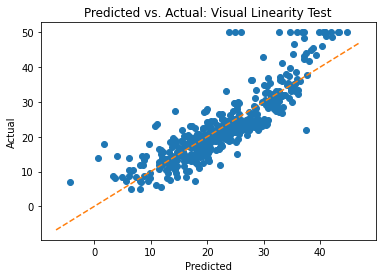

In [ ]:
 results = model.fit()
 #predict y values for training data
 Y1 = model.predict(results.params)

 def abline(slope, intercept):
     """Plot a line from slope and intercept, borrowed from https://stackoverflow.com/questions/7941226/how-to-add-line-based-on-slope-and-intercept-in-matplotlib"""
     axes = plt.gca()
     x_vals = np.array(axes.get_xlim())
     y_vals = intercept + slope * x_vals
     plt.plot(x_vals, y_vals, '--')

 #plot predicted vs actual
 plt.plot(Y1,Y,'o')
 plt.xlabel('Predicted')#,color='white')
 plt.ylabel('Actual')#,color='white')
 plt.title('Predicted vs. Actual: Visual Linearity Test')#,color='white')
 plt.tick_params(axis='x', colors='black')
 plt.tick_params(axis='y', colors='black')
 abline(1,0)
 plt.show()


in this case that there is not a perfect linear relationship. Our predictions are biased towards lower values in both the lower end and especially at the higher values.

#### No Multicollinearity

We can compute the variance influence factors for each predicting variable. It is the ratio of variance in a model with multiple terms, divided by the variance of a model with one term alone.


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
for i in range(len(df.columns[:-1])):
  v=vif(np.matrix(df[:-1]),i)
  print ("Variance inflation factor for {}:{}".format(df.columns[i],round(v,2)))

Variance inflation factor for CRIM:2.13
Variance inflation factor for ZN:2.92
Variance inflation factor for INDUS:14.46
Variance inflation factor for CHAS:1.18
Variance inflation factor for NOX:73.91
Variance inflation factor for RM:135.89
Variance inflation factor for AGE:21.36
Variance inflation factor for DIS:15.49
Variance inflation factor for RAD:15.37
Variance inflation factor for TAX:61.96
Variance inflation factor for PTRATIO:87.63
Variance inflation factor for B:21.31
Variance inflation factor for LSTAT:12.76


We can see here several variables like ‘INDUS’, 'NOX', 'RM' have a high VIF value, meaning they can be predicted by other independent variables in the dataset.

#### Homoskedastic

**The errors are assumed to have a constant variance**, whether the error terms is the same across all values of the independent variable.

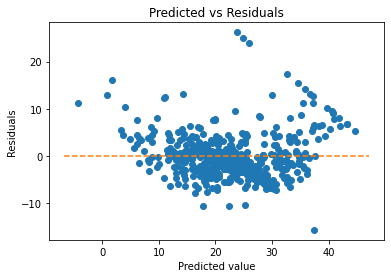

In [ ]:
plt.plot(Y1,Y-Y1,'o')
plt.xlabel(r'Predicted value')
plt.ylabel(r'Residuals')
plt.title('Predicted vs Residuals')
plt.tick_params(axis='x')
plt.tick_params(axis='y')
abline(0,0)

the residuals seem to increase as the fitted Y values increase. So, here heteroscedasticity exists.

#### Normality of error

Text(0.5, 1.0, 'Residuals Q-Q Plot')

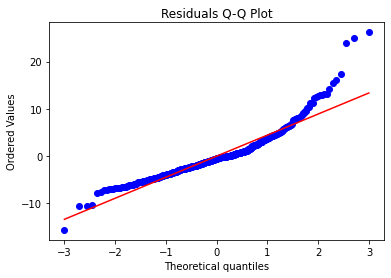

In [ ]:
import scipy.stats as stats 
stats.probplot(Y-Y1, dist="norm", plot= plt)
plt.title("Residuals Q-Q Plot")

 Residuals do not follow Gaussian distribution 

## Two Python modules:

### statsmodels
- statsmodels — a module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. **ols method in the statsmodels library.**

#### OLS Regression: Error Minimization

**OLS minimizes the sum of the squared residuals** between the regression line and the actual data.



In [ ]:
train_data,train_labels=X[:250],Y[:250]
test_data, test_labels=X[250:],Y[250: ]

In [ ]:
# Initialise and fit linear regression model using statsmodels
ols_model = sm.OLS(train_labels,train_data) # sm.OLS(Y,X), Y has to be the first
# Unlike scikit-learn, Statsmodels does not include the intercept by default
train_data = sm.add_constant(train_data) 
ols_model = ols_model.fit()
print(ols_model.summary()) # or ols_model.params 

                            OLS Regression Results                            
Dep. Variable:             HousePrice   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     107.7
Date:                Sun, 31 Jan 2021   Prob (F-statistic):           2.57e-91
Time:                        20:43:58   Log-Likelihood:                -643.72
No. Observations:                 250   AIC:                             1315.
Df Residuals:                     236   BIC:                             1365.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.9403      5.879     -1.691      0.0

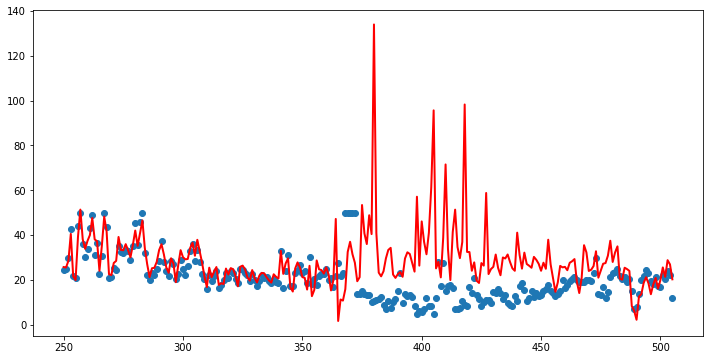

In [ ]:
# predict on test data
ols_predict=ols_model.predict(test_data)
# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(test_labels, 'o')  # scatter plot showing actual data
plt.plot(ols_predict, 'r', linewidth=2)   # regression line
plt.show()

### scikit-learn

a module that provides simple and efficient tools for data mining and data analysis.


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
## Initialise and fit linear regression model using sklearn
# Create linear regression object
lr_model=LinearRegression()
# Train the model using the training sets
lr_model=lr_model.fit(train_data,train_labels) #LinearRegression().fit(X, y)
# Make predictions using the testing set
lr_predict=lr_model.predict(test_data)

statsmodels package gives a quiet decent summary, for LinearRegression, we have to manually print out the result

In [ ]:
# Return the coefficient of determination R^2 of the prediction.
print('R square \n', lr_model.score(train_data,train_labels))
print('Coefficients: \n', lr_model.coef_)
print('Intercept\n',lr_model.intercept_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(test_labels, lr_predict))

R square 
 0.8557424471450606
Coefficients: 
 [ 0.          1.2087076   0.02467928  0.0101453   0.42273515 -8.48035596
  8.86555583 -0.048789   -1.12317328  0.20895074 -0.01600828 -0.65801037
  0.01780364 -0.11553178]
Intercept
 -9.940330973509475
Mean squared error: 304.11
